# ZOMATO DATASET EDA ANALYSIS

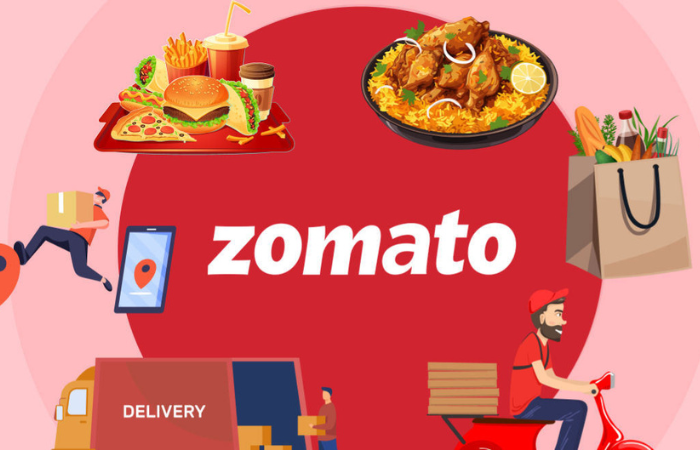

## Problem Statement

Bengaluru's restaurant industry is booming, with over 12,000 establishments offering diverse cuisines. This high demand fuels continuous growth, yet new entrants face significant challenges competing with established brands.

Our objective as data scientists is to harness the power of data to predict restaurant success factors, enabling new ventures to thrive and helping customers discover the best dining experiences with the help of our below analysis.

- The Challenge & Opportunity :Understanding the competitive landscape and the potential of data in Bengaluru's vibrant food scene.

- Data Preparation :Cleaning and transforming raw Zomato data for robust analysis.

- Cuisine & Dish Popularity :Identifying customer favourites and common menu items across restaurants.

- Geographic Distribution :Analysing restaurant density and market saturation in different Bengaluru localities.

- Impact of Facilities :Examining how online ordering and table booking influence customer ratings.

- Customer Rating Insights :Understanding the distribution of aggregate ratings and customer sentiment.

- Strategic Locational Insights :Leveraging data to inform decisions for new restaurant ventures.

## Importing the Libraries

In [2]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# suppress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

## Loading the Dataset

In [3]:
zomato = pd.read_csv(r"F:\Github\Zomato\zomato.csv")

In [4]:
zomato.head().reset_index()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Understanding the basic information about the dataset

In [5]:
zomato.shape

(51717, 17)

In [6]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Checking for the null values

In [7]:
zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
zomato.dropna(inplace = True)
zomato.head()
zomato.shape

(23193, 17)

## Checking the duplicated records

In [8]:
zomato[zomato.duplicated()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [9]:
zomato.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


## Data Cleaning

In [11]:
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Dropping few columns which are not necessary for analysis

In [15]:
columns_to_drop = ['url', 'address', 'reviews_list', 'phone','menu_item']
zomato.drop(columns=[col for col in columns_to_drop if col in zomato.columns], inplace=True)


In [16]:
# Renaming some of the columns
zomato.rename(columns = {'approx_cost(for two people)': 'cost',
                         'listed_in(type)': 'type',
                         'listed_in(city)': 'city'}, inplace=True)
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


### Claning the Rate Column

In [13]:
zomato["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
#removing the New "-" "/5" from rate colums
def handlerate(value):
    if(value == "NEW" or value =="-"):
        return np.nan
    else:
        value =str(value).split("/")
        value = value[0]
        return float(value)
zomato["rate"] = zomato["rate"].apply(handlerate)
zomato["rate"].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

### Comparing City and Location

In [17]:
zomato.location.unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [18]:
zomato.city.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

Since we have same columns in city and Location we can drop city for our further analysis

In [19]:
zomato = zomato.drop(["city"],axis =1) 

### Handling Cost column

In [20]:
zomato.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [21]:
def handlecomma(value):
    value = str(value)
    if "," in value:
        value = value.replace(",","")
        return float(value)
    else:
        return float(value)
zomato["cost"]= zomato["cost"].apply(handlecomma)

In [22]:
zomato.cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

### Cleaning Restuarant type column

In [23]:
zomato.rest_type.value_counts()

rest_type
Casual Dining                7349
Quick Bites                  5240
Cafe                         2325
Dessert Parlor               1076
Casual Dining, Bar            984
                             ... 
Fine Dining, Microbrewery       5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: count, Length: 73, dtype: int64

In [26]:
rest_types = zomato["rest_type"].value_counts(ascending = False)
rest_types

rest_type
Casual Dining                7349
Quick Bites                  5240
Cafe                         2325
Dessert Parlor               1076
Casual Dining, Bar            984
                             ... 
Fine Dining, Microbrewery       5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: count, Length: 73, dtype: int64

In [27]:
rest_type_lessthan1k = rest_types[rest_types<1000]
rest_type_lessthan1k

rest_type
Casual Dining, Bar           984
Delivery                     670
Bar                          357
Bar, Casual Dining           343
Takeaway, Delivery           343
                            ... 
Fine Dining, Microbrewery      5
Club, Casual Dining            4
Dessert Parlor, Kiosk          2
Dhaba                          1
Food Court, Casual Dining      1
Name: count, Length: 69, dtype: int64

In [28]:
def handle_rest_type(value):
    if(value in rest_type_lessthan1k):
        return"others"
    else:
        return value
zomato["rest_type"] = zomato["rest_type"].apply(handle_rest_type)

The Restaurants having count less than 1000 are categorised under "Others"

In [29]:
zomato.rest_type.value_counts()

rest_type
Casual Dining     7349
others            7203
Quick Bites       5240
Cafe              2325
Dessert Parlor    1076
Name: count, dtype: int64

### Cleaning the Location

In [30]:
zomato.location.value_counts()

location
Koramangala 5th Block    1783
BTM                      1456
Indiranagar              1350
HSR                      1162
Jayanagar                1037
                         ... 
Kanakapura Road             2
West Bangalore              2
Yelahanka                   2
Magadi Road                 2
KR Puram                    1
Name: count, Length: 88, dtype: int64

In [31]:
location = zomato["location"].value_counts(ascending  = False)
location_lessthan300 = location[location<300]

def handle_location(value):
    if (value in location_lessthan300):
        return "others"
    else:
        return value
zomato["location"] = zomato["location"].apply(handle_location)
zomato.location.value_counts()

location
others                   3730
Koramangala 5th Block    1783
BTM                      1456
Indiranagar              1350
HSR                      1162
Jayanagar                1037
JP Nagar                 1016
Whitefield                824
Koramangala 7th Block     725
Koramangala 6th Block     720
Marathahalli              683
Koramangala 4th Block     644
MG Road                   596
Brigade Road              570
Church Street             508
Bannerghatta Road         496
Ulsoor                    477
Kalyan Nagar              467
Koramangala 1st Block     466
Bellandur                 462
Sarjapur Road             456
Lavelle Road              445
Residency Road            442
Banashankari              387
Malleshwaram              366
Richmond Road             351
Cunningham Road           333
Electronic City           327
Brookefield               307
St. Marks Road            304
New BEL Road              303
Name: count, dtype: int64

In [32]:
cuisines = zomato["cuisines"].value_counts(ascending = True)
cuisines

cuisines
Thai, Chinese, Momos                          1
Andhra, North Indian, South Indian            1
Andhra, Hyderabadi, Biryani                   1
Tibetan, Nepalese                             1
Italian, North Indian, Continental, BBQ       1
                                           ... 
South Indian, North Indian, Chinese         233
Cafe                                        273
South Indian                                359
North Indian, Chinese                       777
North Indian                               1144
Name: count, Length: 1687, dtype: int64

In [33]:
cuisines_lessthan100 = cuisines[cuisines<100]

In [34]:
def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return "others"
    else:
        return value
zomato["cuisines"] = zomato["cuisines"].apply(handle_cuisines)
zomato.cuisines.value_counts()

cuisines
others                                              17606
North Indian                                         1144
North Indian, Chinese                                 777
South Indian                                          359
Cafe                                                  273
South Indian, North Indian, Chinese                   233
Bakery, Desserts                                      215
Desserts, Beverages                                   214
Chinese                                               210
Ice Cream, Desserts                                   208
Desserts                                              206
Biryani                                               169
Chinese, Momos                                        162
Finger Food                                           151
Fast Food                                             150
North Indian, Chinese, Biryani                        139
Mithai, Street Food                                   138
North

## Cleaned Dataset Preview

In [36]:
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,others,300.0,Buffet
4,Grand Village,No,No,3.8,166,others,Casual Dining,"Panipuri, Gol Gappe",others,600.0,Buffet


## Data Visualisation through EDA

## 1. Number of Restaurants by Location

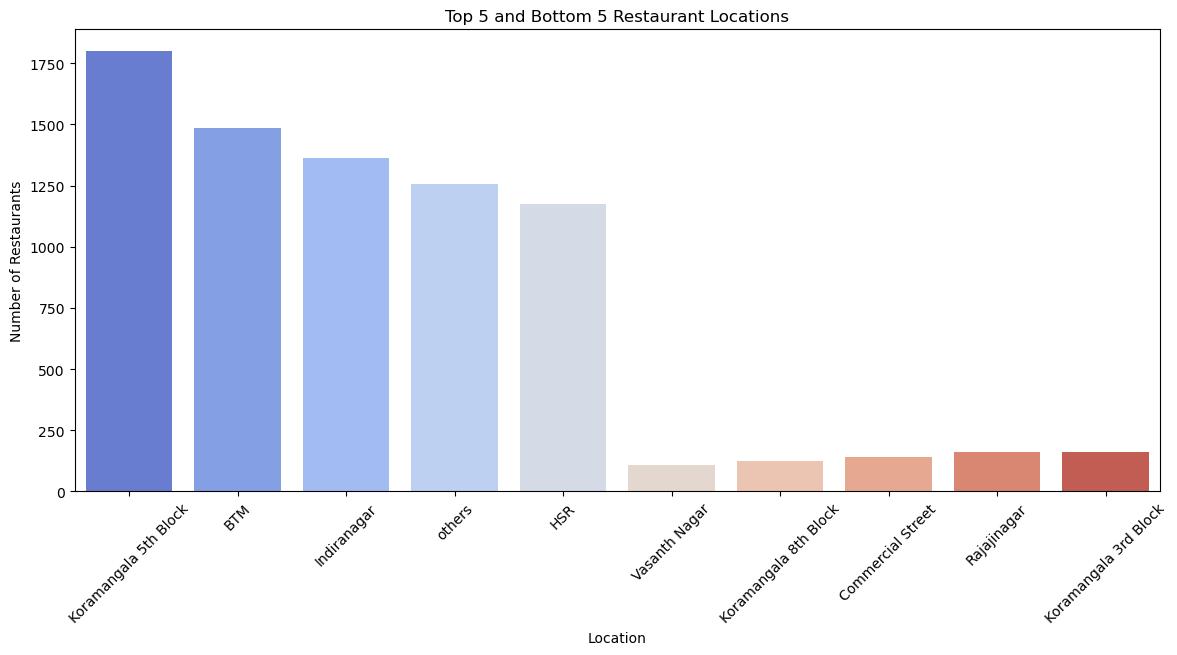

In [3]:
# Get location counts
location_counts = zomato['location'].value_counts()

# Get top 5 and bottom 5
top5 = location_counts.nlargest(5)
bottom5 = location_counts.nsmallest(5)

# Combine them into one DataFrame
top_bottom = pd.concat([top5, bottom5])

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x=top_bottom.index, y=top_bottom.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title('Top 5 and Bottom 5 Restaurant Locations')
plt.ylabel('Number of Restaurants')
plt.xlabel('Location')
plt.show()

### Key Insights:

1.High concentration in popular areas – The top 5 locations (e.g., Koramangala, Indiranagar, etc.) have a significantly higher restaurant density, showing these are prime dining hubs with strong customer footfall and competition.

2.Low market presence in bottom 5 – The bottom 5 locations have minimal restaurant representation, suggesting either low demand, limited infrastructure, or untapped markets that could be explored.

3.Potential business strategy – While top 5 areas offer visibility and customer reach, the bottom 5 areas might present low-competition opportunities for niche or first-mover advantage if demand grows.


## 2.Various Types of Restaurant we have in Bangalore

rest_type
Casual Dining         7387
Quick Bites           5267
Cafe                  2380
Dessert Parlor        1083
Casual Dining, Bar     986
Delivery               707
Name: count, dtype: int64


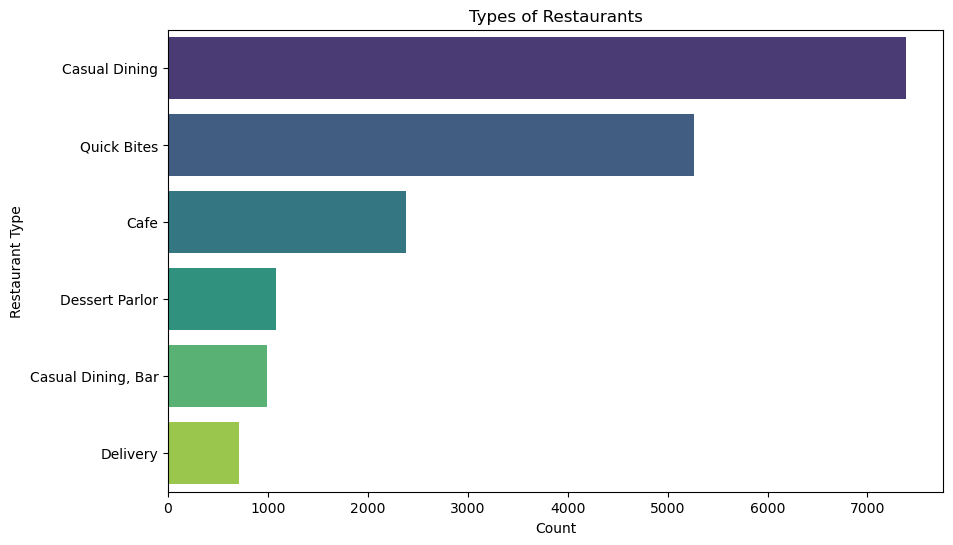

In [4]:
# Filter out "Other"
zomato_no_other = zomato[zomato['rest_type'] != 'others']

# Get top 10 restaurant types excluding "Other"
rest_type_counts = zomato_no_other["rest_type"].value_counts()
print(rest_type_counts.head(10))

# Plot without "Other"
plt.figure(figsize=(10,6))
sns.countplot(
    data=zomato_no_other, 
    y='rest_type', 
    order=zomato_no_other['rest_type'].value_counts().index, 
    palette='viridis'
)
plt.title("Types of Restaurants")
plt.xlabel("Count")
plt.ylabel("Restaurant Type")
plt.show()

### Key Insights:

1.Casual Dining dominates – 
It is the most common restaurant type by a wide margin, with around 7,400 outlets, showing strong customer preference for sit-down dining experiences.

2.Specialized formats are niche – 
Dessert Parlors, Casual Dining Bars, and Delivery-only outlets have relatively small market presence, each with under 1,100 outlets, catering to more specific customer needs.

3.Opening a Casula Dining or a Bar will help you earn more money as the number of these are very less in the market.

## 3.The Top rated restaurants from each Area

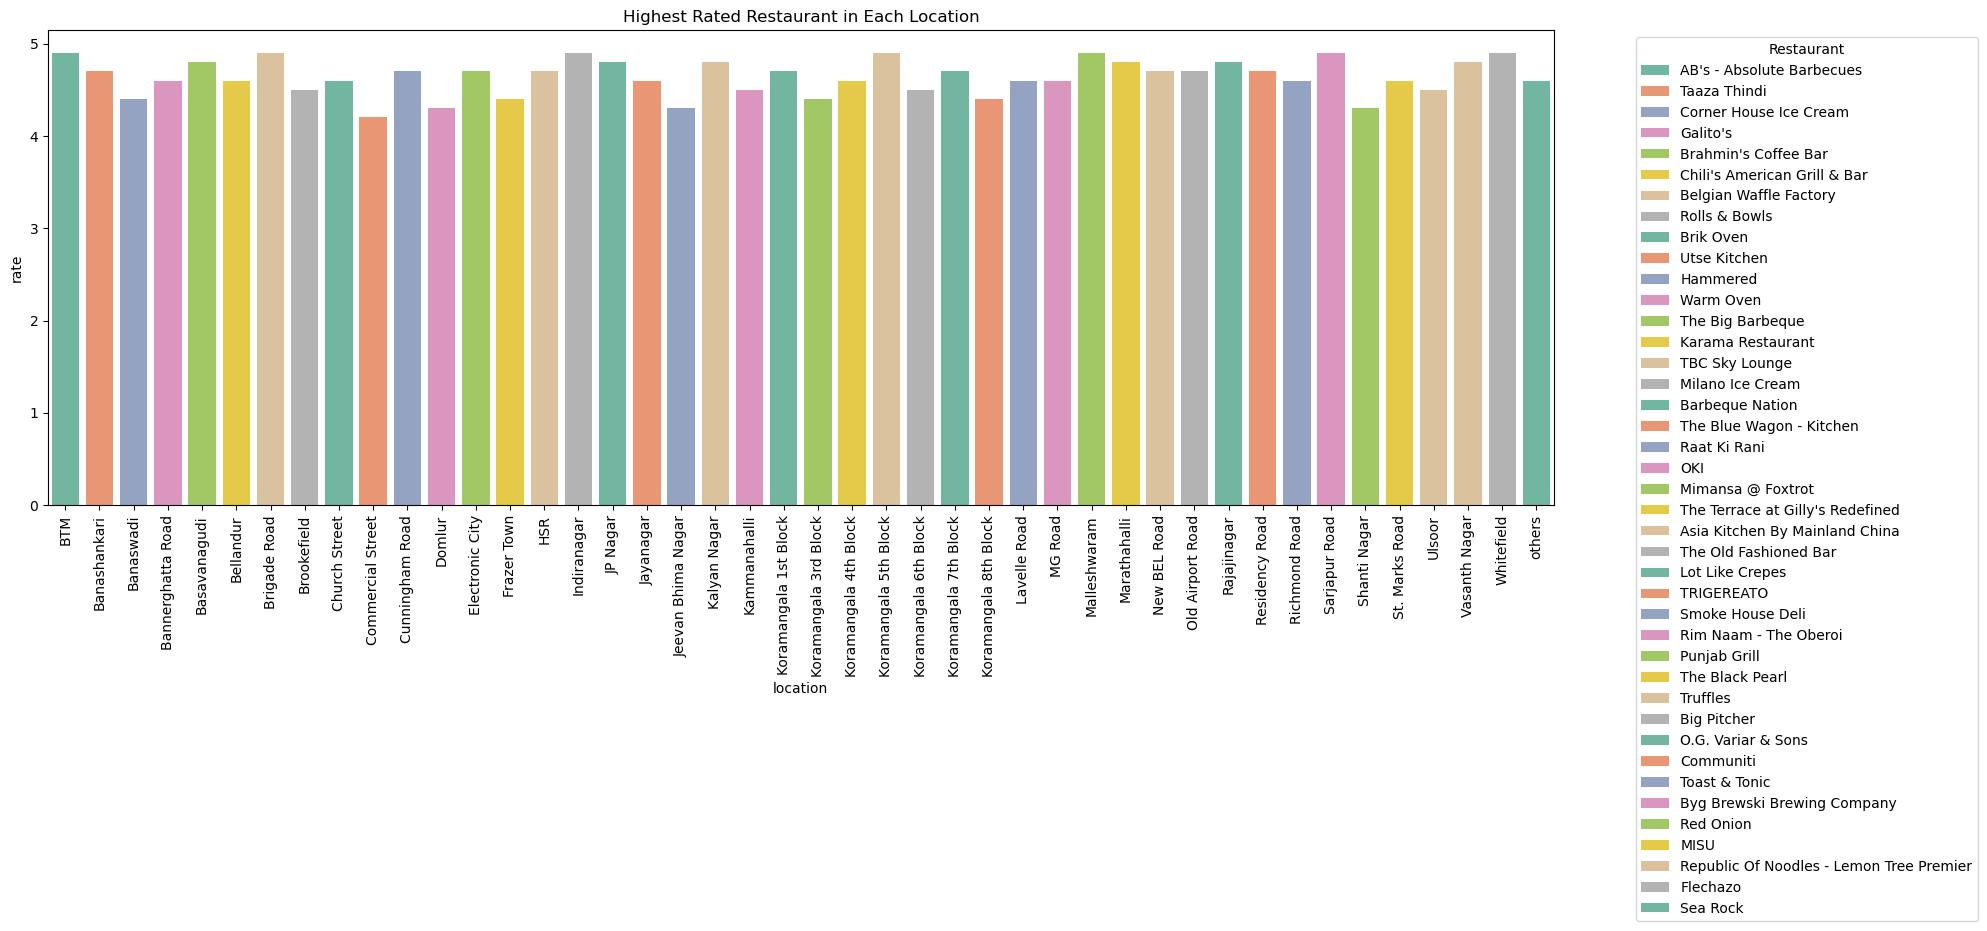

In [6]:
q2 = zomato.loc[zomato.groupby('location')['rate'].idxmax()]
plt.figure(figsize=(20, 8))
sns.barplot(data=q2, x='location', y='rate', hue='name', dodge=False, palette='Set2')
plt.title('Highest Rated Restaurant in Each Location')
plt.xticks(rotation=90)
plt.legend(title='Restaurant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Key Insights:

1.High rating consistency across locations – 
Most highest-rated restaurants in each location score between 4.3 and 4.9, showing strong competition in quality.

2.No single restaurant dominates all locations – 
The top-rated spot varies widely by area, suggesting that local favorites and niche offerings are key to success in different neighborhoods.

3.Premium and specialty brands perform strongly – 
Many highest-rated restaurants are well-known for specific cuisines (e.g., barbeque, desserts, or coffee), indicating that specialization helps secure top ratings.

## 4.Best choice of the Restaurant for different Cuisine in Banagalore

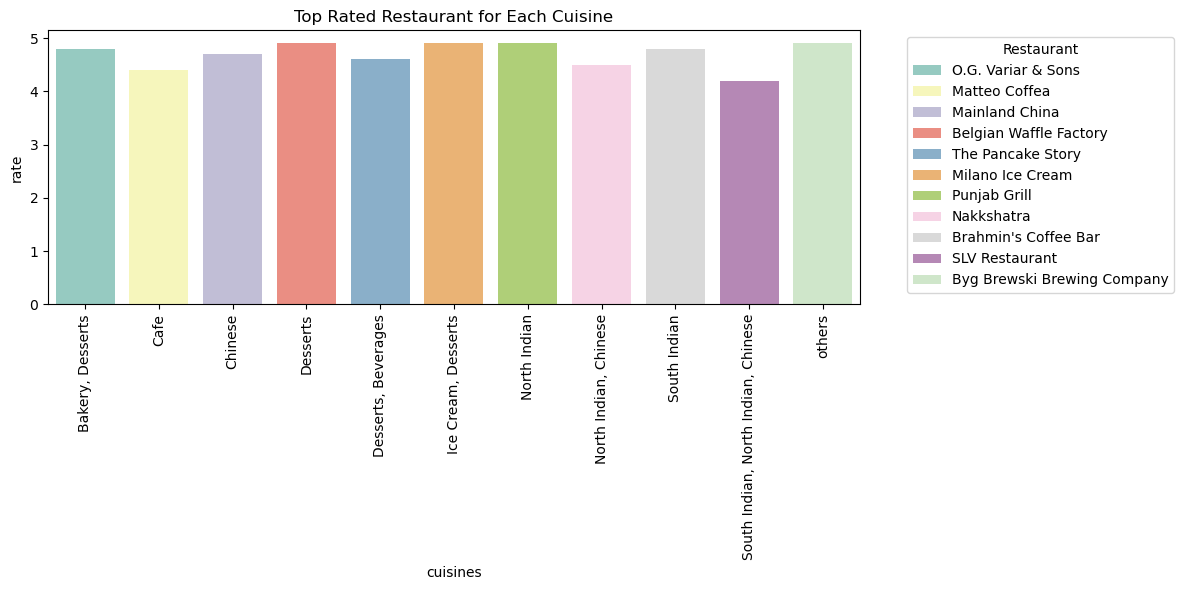

In [7]:
q3 = zomato.loc[zomato.groupby('cuisines')['rate'].idxmax()]
plt.figure(figsize=(12, 6))
sns.barplot(data=q3, x='cuisines', y='rate', hue='name', dodge=False, palette='Set3')
plt.title('Top Rated Restaurant for Each Cuisine')
plt.xticks(rotation=90)
plt.legend(title='Restaurant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Key Insights:

1.Dessert-focused restaurants dominate top ratings – 
Belgian Waffle Factory and Milano Ice Cream lead their categories with ratings close to 5, showing strong customer preference for sweet-focused cuisines.

2.North Indian cuisine holds consistently high ratings – 
Punjab Grill achieves nearly perfect scores, indicating high customer satisfaction for this category.

3.Cafés have relatively lower top ratings – 
Matteo Coffea, while leading in the Café category, has the lowest rating among top cuisine leaders, suggesting greater competition or varied customer expectations in this segment.

## 5. Online and book table based on rest_type

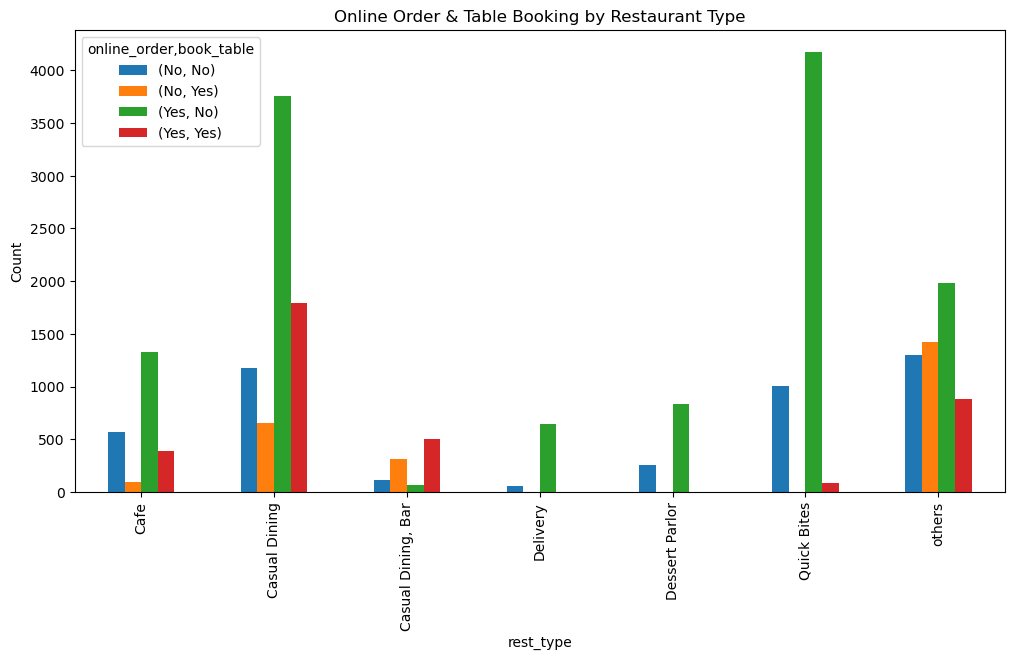

In [8]:
online_book = pd.crosstab(zomato['rest_type'], [zomato['online_order'], zomato['book_table']])
online_book.plot(kind='bar', figsize=(12,6))
plt.title("Online Order & Table Booking by Restaurant Type")
plt.ylabel("Count")
plt.show()

### Key Insights:

1.Casual Dining dominates – 
It has the highest number of restaurants without online ordering or table booking, surpassing 7,000, indicating this type is the most common in this category.

2.Quick Bites and “Others” are also popular – 
Both have counts above 5,000, suggesting these are significant segments for non-online/non-reservation dining.

3.Delivery-focused restaurants are rare in this segment – 
Delivery and Dessert Parlors have notably low counts, under 1,200, meaning they are less likely to operate without online ordering or reservations.


## 6. Dish liked with type and cost_for_two

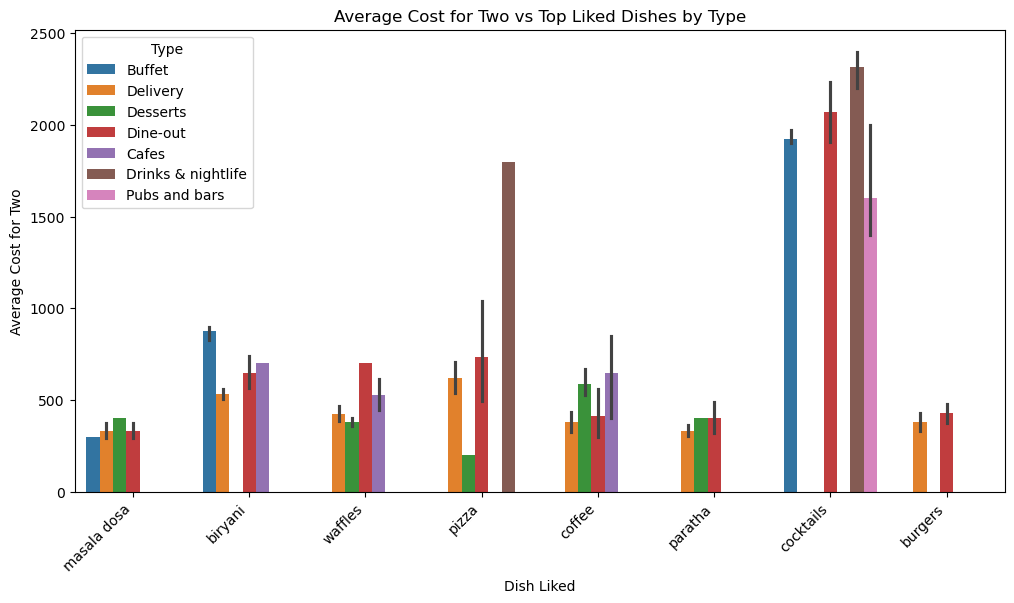

In [9]:
# Remove unwanted 'dish_liked' values
zomato_filtered = zomato[~zomato['dish_liked'].isin(['rooftop ambience', 'friendly staff','prompt service'])]

# Prepare data: take top 10 most liked dishes (excluding the removed ones)
top_dishes = zomato_filtered['dish_liked'].value_counts().nlargest(8).index
filtered = zomato_filtered[zomato_filtered['dish_liked'].isin(top_dishes)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=filtered,
    x='dish_liked',
    y='cost_for_two',
    hue='type',
    estimator='mean',
    palette='tab10'
)

plt.xticks(rotation=45, ha='right')
plt.title("Average Cost for Two vs Top Liked Dishes by Type")
plt.ylabel("Average Cost for Two")
plt.xlabel("Dish Liked")
plt.legend(title="Type")
plt.show()

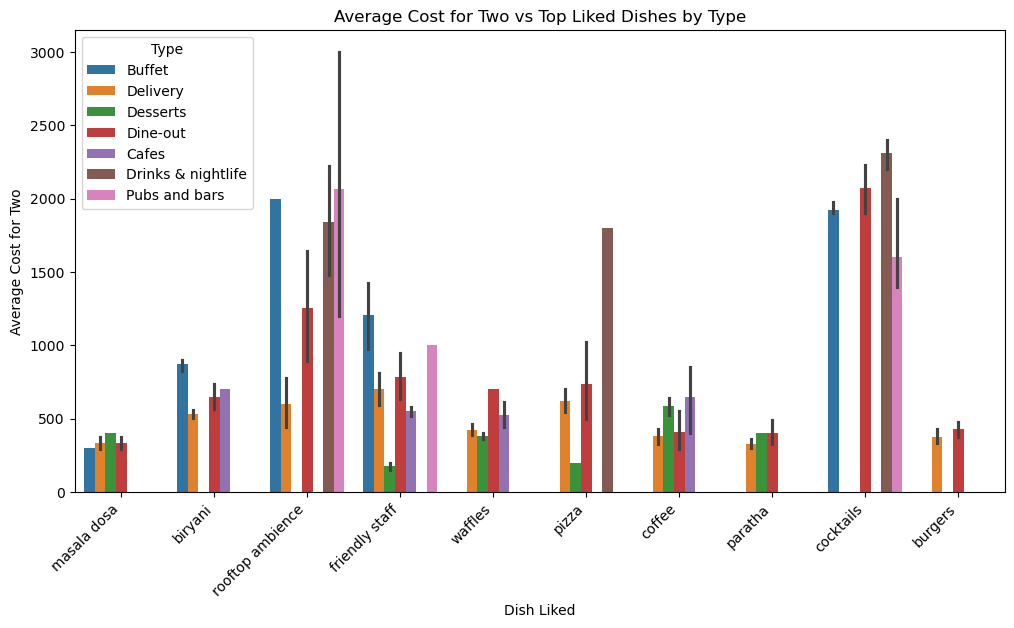

In [10]:
# Prepare data: take top 10 most liked dishes
top_dishes = zomato['dish_liked'].value_counts().nlargest(10).index
filtered = zomato[zomato['dish_liked'].isin(top_dishes)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=filtered,
    x='dish_liked',
    y='cost_for_two',
    hue='type',
    estimator='mean',
    palette='tab10'
)

plt.xticks(rotation=45, ha='right')
plt.title("Average Cost for Two vs Top Liked Dishes by Type")
plt.ylabel("Average Cost for Two")
plt.xlabel("Dish Liked")
plt.legend(title="Type")
plt.show()

### Key Insights: 

1.Casual Dining leads significantly – 
It’s the top restaurant type without online ordering or table booking, exceeding 7,000 listings.

2.Quick Bites is the second most common – 
With over 5,000 outlets, it shows strong offline presence.

3.Delivery and Dessert Parlors are rare –
Both have low counts (under 1,200), meaning most in these categories rely on online orders or reservations.

## 7.Cost for Two by Type

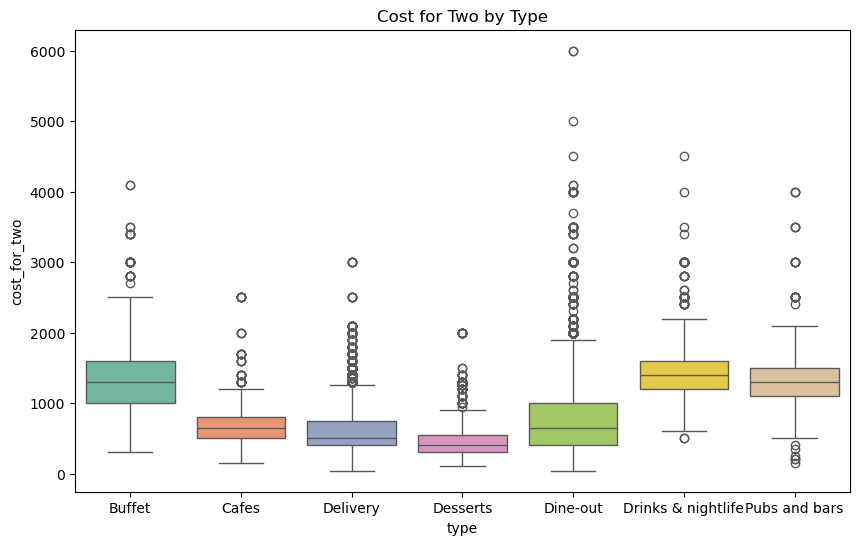

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=zomato, x='type', y='cost_for_two', hue='type', palette='Set2')
plt.title("Cost for Two by Type")
plt.show()


### Key Insights: 

Casual Dining dominates – 
It’s the most common restaurant type, far surpassing all others in count.

Quick Bites is the clear runner-up – 
While smaller than Casual Dining, it still holds a strong market presence.

Niche categories are minimal – 
Types like Buffet, Pub, and Microbrewery have very few outlets, indicating a highly specialized market.

## 8. Location wise cost

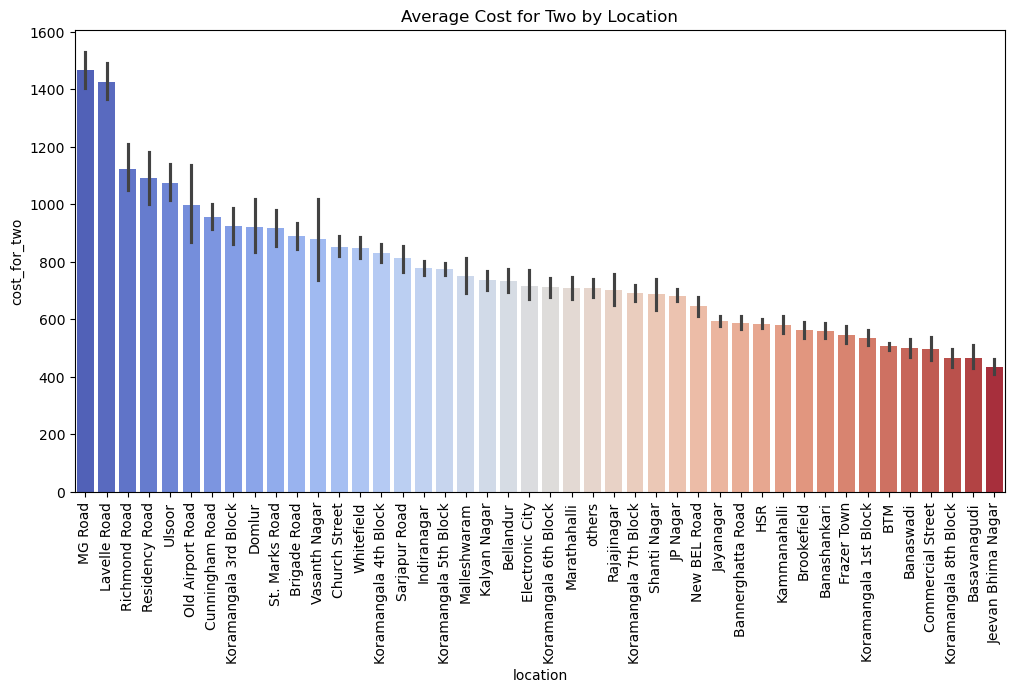

In [12]:
order = zomato.groupby('location')['cost_for_two'].mean().sort_values(ascending=False).index

plt.figure(figsize=(12,6))
sns.barplot(
    data=zomato, 
    x='location', 
    y='cost_for_two', 
    estimator='mean', 
    palette='coolwarm', 
    order=order
)
plt.title("Average Cost for Two by Location")
plt.xticks(rotation=90)
plt.show()

### Key Insights:

1.High-End Areas: Locations like Brigade Road and Church Street have the highest average cost for two, exceeding ₹1400.

2.Affordable Options: Areas such as Old Airport Road and HSR are significantly more affordable, with an average cost around ₹600.

3.Koramangala's Price Variation: 
Within the same large neighborhood, Koramangala, there is a wide range of pricing, with some blocks (e.g., 3rd and 4th) being more expensive than others (e.g., 5th and 7th).

## 9.Do restaurants with table booking have better ratings?

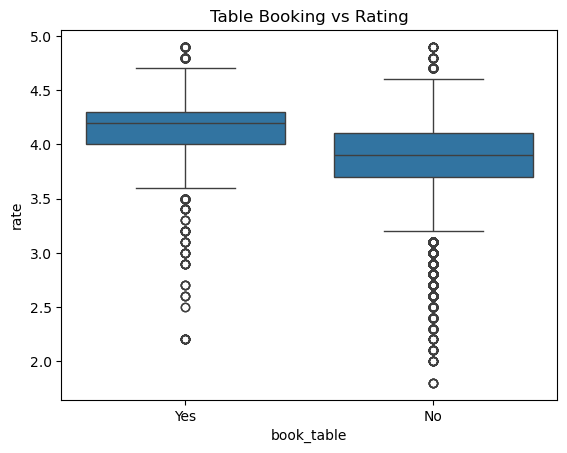

In [13]:
sns.boxplot(x='book_table', y='rate', data=zomato)
plt.title("Table Booking vs Rating")
plt.show()

### Key Insights:

Offering table booking might improve customer satisfaction and ratings.
Consistency in ratings suggests that booking restaurants may deliver more predictable experiences.

## 10.Which restaurant has the best rating per rupee spent

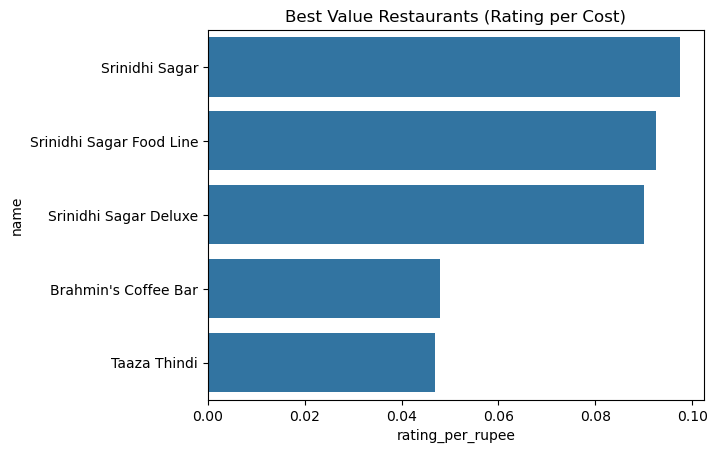

In [14]:
zomato['rating_per_rupee'] = zomato['rate'] / zomato['cost_for_two']
best_value = zomato.sort_values('rating_per_rupee', ascending=False).head(10)
sns.barplot(x='rating_per_rupee', y='name', data=best_value)
plt.title('Best Value Restaurants (Rating per Cost)')
plt.show()

### Key Insights:

Low cost with high ratings is a competitive edge in the food industry.
The Srinidhi Sagar chain appears to dominate in the budget-friendly yet high-quality segment.
For budget-conscious diners seeking maximum satisfaction for their spending, the top three restaurants are clear choices.

## 11.Are higher-rated restaurants more likely to accept online orders?

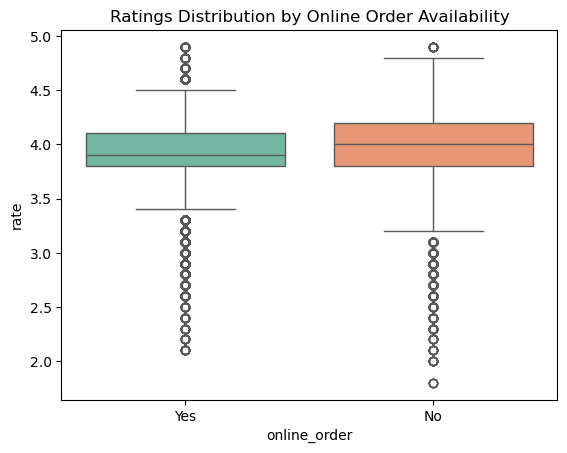

In [15]:
sns.boxplot(data=zomato, x='online_order', y='rate', palette='Set2')
plt.title('Ratings Distribution by Online Order Availability')
plt.show()

### Key Insights:

Offering online orders doesn’t automatically boost ratings — quality of service and food likely matter more.
However, the "Yes" category has more restaurants achieving exceptionally high ratings, which might indicate that online ordering helps well-performing restaurants stand out more.
The large number of low-rating outliers in both categories suggests a need to focus on service consistency.

## 12.Most Liked Dish by Restaurant Type

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_dish_by_rest_type,
    x='count',
    y='rest_type',
    hue='dish_liked',
    dodge=False
)
plt.title("Most Liked Dish by Restaurant Type")
plt.xlabel("Count")
plt.ylabel("Restaurant Type")
plt.legend(title="Dish Liked")
plt.show()

### Key Insights:

1.Biryani's Dominance: Biryani is the most liked dish in both "Casual Dining" and "Quick Bites" restaurants, highlighting its widespread popularity.

2.Dessert Parlor Specialization: Dessert Parlors are specifically known for waffles.

3.Cafe Diversity: Cafes have a broad range of popular items, including burgers, coffee, and pasta.